In [ ]:
%run C:\Users\Omar\Intern_Final_Project\notebooks\Data_Cleaning\Features_Selection.ipynb

### *cross validation*

*We will keep the last 16 rows of the dataset and do a Rolling Moving Origin of step size of 4*


*lets explain this visually*

In [428]:
from sklearn.model_selection import TimeSeriesSplit

In [429]:
test_data_red=df_red[-16:]
#####
X = test_data_red.drop("price",axis=1)
y = test_data_red["price"]
date=test_data_red.reset_index()["week_end_dt"]
tscv = TimeSeriesSplit(n_splits=3,max_train_size=16,test_size=4,gap=0)
for i, (train_index, test_index) in enumerate(tscv.split(X)):
     print(f"Fold {i}:")
     print(f"  Train: index={train_index}")
     print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2 3]
  Test:  index=[4 5 6 7]
Fold 1:
  Train: index=[0 1 2 3 4 5 6 7]
  Test:  index=[ 8  9 10 11]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11]
  Test:  index=[12 13 14 15]


The above code out come expresess how the cross validation works ,
1st fold : we consider the 4 intial points as train data and the next 4 points as test data
2ns fold : the test points from the prevuoys fold we be appened to the new train points asnd new points ahead are test points
3rd fold : works as metioned above

The below chart is ease the process:


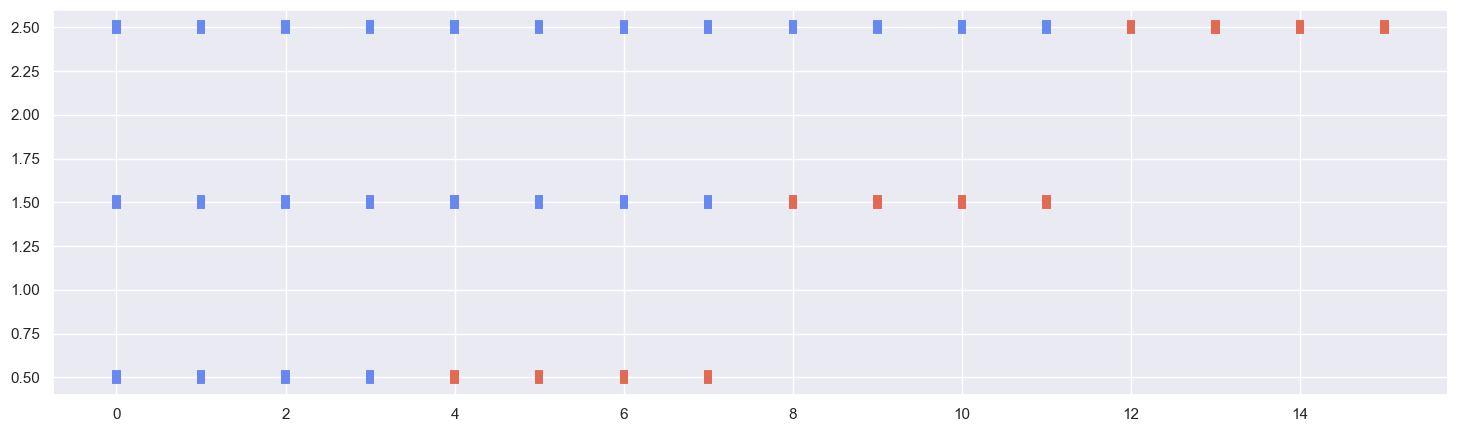

In [430]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, n_splits, X, y):
    fig, ax = plt.subplots(1, 1, figsize = (18, 5))
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)
        
plot_cv_indices(cv=tscv,n_splits=3,X=X,y=y)

---
importing needed libraries

In [431]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm.sklearn import LGBMRegressor
import warnings                                  
warnings.filterwarnings('ignore')

In [432]:
tscv = TimeSeriesSplit(n_splits=3,max_train_size=16,test_size=4,gap=0)

In [ ]:

mape_scores = []
y_pred_red_results=[]

models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                  "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]
              
models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
        XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]


test_data_red=df_red  
time_series_data_red = test_data_red.values

for model in models:
              for train_index, test_index in tscv.split(time_series_data_red):
                                  X_train, y_train = time_series_data_red[train_index, 1:], time_series_data_red[train_index, 0]
                                  X_test, y_test = time_series_data_red[test_index, 1:], time_series_data_red[test_index, 0]

                                  model.fit(X_train, y_train)
                                  y_pred_red = model.predict(X_test)
                                  y_pred_red_results.append(y_pred_red)
                                  mape = np.mean(mean_absolute_percentage_error(y_test, y_pred_red))
                                  mape_scores.append(mape)       


outcome_red=pd.concat([pd.DataFrame(pd.DataFrame(y_pred_red_results[0:3]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_red_results[3:6]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_red_results[6:9]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_red_results[9:12]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_red_results[12:15]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_red_results[15:18]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_red_results[18:21]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_red_results[21:24]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_red_results[24:27]).stack().reset_index(drop=True))],axis=1)                                

outcome__red_mape=pd.concat([pd.DataFrame(pd.DataFrame(mape_scores[0:3]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[3:6]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[6:9]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[9:12]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[12:15]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[15:18]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[18:21]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[21:24]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[24:27]).stack().reset_index(drop=True)),],axis=1)


In [434]:

new_date_index=pd.date_range(start="2023-07-16",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})
outcome_red.columns=models_names
outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1).set_index("date")
outcome__red_mape.columns=models_names


In [ ]:
mape_scores = []
y_pred_green_results=[]

models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                  "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]
              
models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
        XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]


test_data_green=df_green  
time_series_data_green = test_data_green.values

for model in models:
              for train_index, test_index in tscv.split(time_series_data_green):
                                  X_train, y_train = time_series_data_green[train_index, 1:], time_series_data_green[train_index, 0]
                                  X_test, y_test = time_series_data_green[test_index, 1:], time_series_data_green[test_index, 0]

                                  model.fit(X_train, y_train)
                                  y_pred_green = model.predict(X_test)
                                  y_pred_green_results.append(y_pred_green)
                                  mape = np.mean(mean_absolute_percentage_error(y_test, y_pred_green))
                                  mape_scores.append(mape)       


outcome_green=pd.concat([pd.DataFrame(pd.DataFrame(y_pred_green_results[0:3]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_green_results[3:6]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_green_results[6:9]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_green_results[9:12]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_green_results[12:15]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_green_results[15:18]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_green_results[18:21]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_green_results[21:24]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_green_results[24:27]).stack().reset_index(drop=True))],axis=1)                                

outcome__green_mape=pd.concat([pd.DataFrame(pd.DataFrame(mape_scores[0:3]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[3:6]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[6:9]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[9:12]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[12:15]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[15:18]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[18:21]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[21:24]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[24:27]).stack().reset_index(drop=True)),],axis=1)



In [436]:
outcome_green.columns=models_names
outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1).set_index("date")
outcome__green_mape.columns=models_names

In [ ]:
mape_scores = []
y_pred_yellow_results=[]

models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                  "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]
              
models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
        XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]


test_data_yellow=df_yellow
time_series_data_yellow = test_data_yellow.values

for model in models:
              for train_index, test_index in tscv.split(time_series_data_yellow):
                                  X_train, y_train = time_series_data_yellow[train_index, 1:], time_series_data_yellow[train_index, 0]
                                  X_test, y_test = time_series_data_yellow[test_index, 1:], time_series_data_yellow[test_index, 0]

                                  model.fit(X_train, y_train)
                                  y_pred_yellow = model.predict(X_test)
                                  y_pred_yellow_results.append(y_pred_yellow)
                                  mape = np.mean(mean_absolute_percentage_error(y_test, y_pred_yellow))
                                  mape_scores.append(mape)       


outcome_yelow=pd.concat([pd.DataFrame(pd.DataFrame(y_pred_yellow_results[0:3]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_yellow_results[3:6]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_yellow_results[6:9]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_yellow_results[9:12]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_yellow_results[12:15]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_yellow_results[15:18]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_yellow_results[18:21]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_yellow_results[21:24]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(y_pred_yellow_results[24:27]).stack().reset_index(drop=True))],axis=1)                                

outcome__yellow_mape=pd.concat([pd.DataFrame(pd.DataFrame(mape_scores[0:3]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[3:6]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[6:9]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[9:12]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[12:15]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[15:18]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[18:21]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[21:24]).stack().reset_index(drop=True)),
           pd.DataFrame(pd.DataFrame(mape_scores[24:27]).stack().reset_index(drop=True)),],axis=1)

In [438]:
outcome_yelow.columns=models_names
outcome_yelow_all=pd.concat([outcome_yelow,new_date_index],axis=1).set_index("date")
outcome__yellow_mape.columns=models_names

In [439]:
outcome__red_mape

,DecisionTreeRegressor,RandomForestRegressor,SVR(),LinearRegression,XGBRegressor_boo,XGBRFRegressor_boo,AdaBoostRegressor_boo,LGBMRegressor_boo,CatBoostRegressor_boo
0,0.127845,0.060874,0.042993,0.118308,0.085809,0.052477,0.092535,0.037060,0.054248
1,0.112900,0.115337,0.088937,0.035053,0.088978,0.092967,0.089936,0.102334,0.090850
2,0.095834,0.089996,0.094745,0.033887,0.041225,0.040664,0.068453,0.125801,0.075923


In [440]:
pd.DataFrame(outcome__red_mape.mean(),columns=['score']).reset_index().sort_values(by="score").T

,5,3,4,8,2,6,7,1,0
index,XGBRFRegressor_boo,LinearRegression,XGBRegressor_boo,CatBoostRegressor_boo,SVR(),AdaBoostRegressor_boo,LGBMRegressor_boo,RandomForestRegressor,DecisionTreeRegressor
score,0.062036,0.062416,0.072004,0.073674,0.075558,0.083641,0.088398,0.088736,0.112193


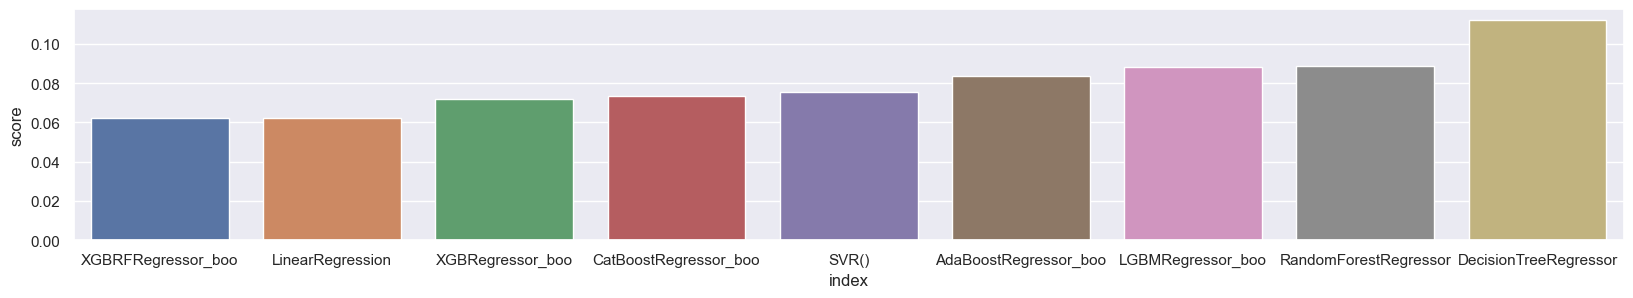

In [441]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(data=pd.DataFrame(outcome__red_mape.mean(),columns=['score']).reset_index().sort_values(by="score"),x="index",y="score");

In [442]:
outcome__green_mape

,DecisionTreeRegressor,RandomForestRegressor,SVR(),LinearRegression,XGBRegressor_boo,XGBRFRegressor_boo,AdaBoostRegressor_boo,LGBMRegressor_boo,CatBoostRegressor_boo
0,0.075194,0.061587,0.043994,0.249063,0.074832,0.053989,0.075194,0.044919,0.037265
1,0.060876,0.093361,0.075594,0.072235,0.059198,0.068465,0.060876,0.066799,0.066194
2,0.024393,0.025204,0.045943,0.150029,0.020116,0.018591,0.017339,0.074411,0.025887


In [443]:
pd.DataFrame(outcome__green_mape.mean(),columns=['score']).reset_index().sort_values(by="score").T

,8,5,6,4,0,2,1,7,3
index,CatBoostRegressor_boo,XGBRFRegressor_boo,AdaBoostRegressor_boo,XGBRegressor_boo,DecisionTreeRegressor,SVR(),RandomForestRegressor,LGBMRegressor_boo,LinearRegression
score,0.043115,0.047015,0.051137,0.051382,0.053488,0.055177,0.060051,0.062043,0.157109


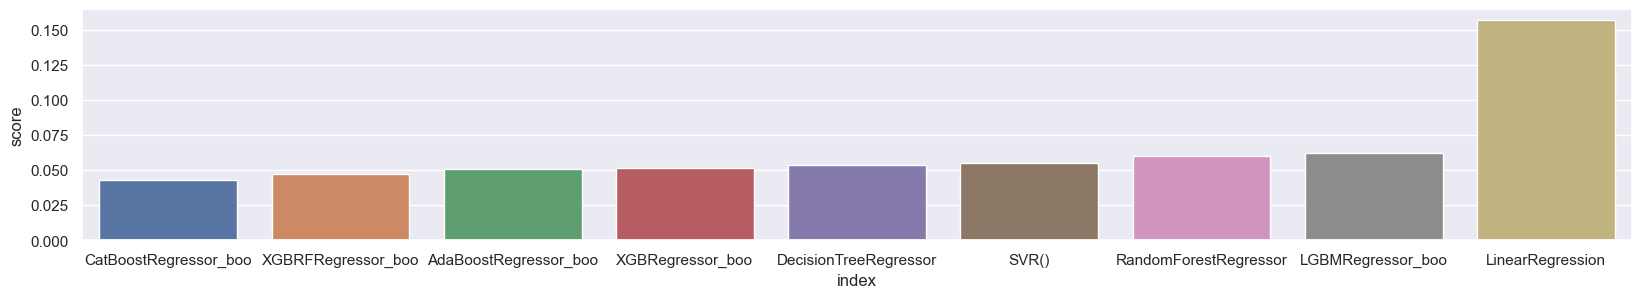

In [444]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(pd.DataFrame(outcome__green_mape.mean(),columns=['score']).reset_index().sort_values(by="score"),x="index",y="score");

In [445]:
outcome__yellow_mape

,DecisionTreeRegressor,RandomForestRegressor,SVR(),LinearRegression,XGBRegressor_boo,XGBRFRegressor_boo,AdaBoostRegressor_boo,LGBMRegressor_boo,CatBoostRegressor_boo
0,0.040295,0.076041,0.257419,0.100533,0.044277,0.092161,0.057519,0.239946,0.134637
1,0.166530,0.134134,0.141284,0.337943,0.175874,0.159718,0.166530,0.116027,0.117160
2,0.061649,0.091670,0.189012,0.192640,0.054366,0.088829,0.061649,0.133924,0.107523


In [446]:
pd.DataFrame(outcome__yellow_mape.mean(),columns=['score']).reset_index().sort_values(by="score").T

,0,4,6,1,5,8,7,2,3
index,DecisionTreeRegressor,XGBRegressor_boo,AdaBoostRegressor_boo,RandomForestRegressor,XGBRFRegressor_boo,CatBoostRegressor_boo,LGBMRegressor_boo,SVR(),LinearRegression
score,0.089491,0.091506,0.095233,0.100615,0.113569,0.119773,0.163299,0.195905,0.210372


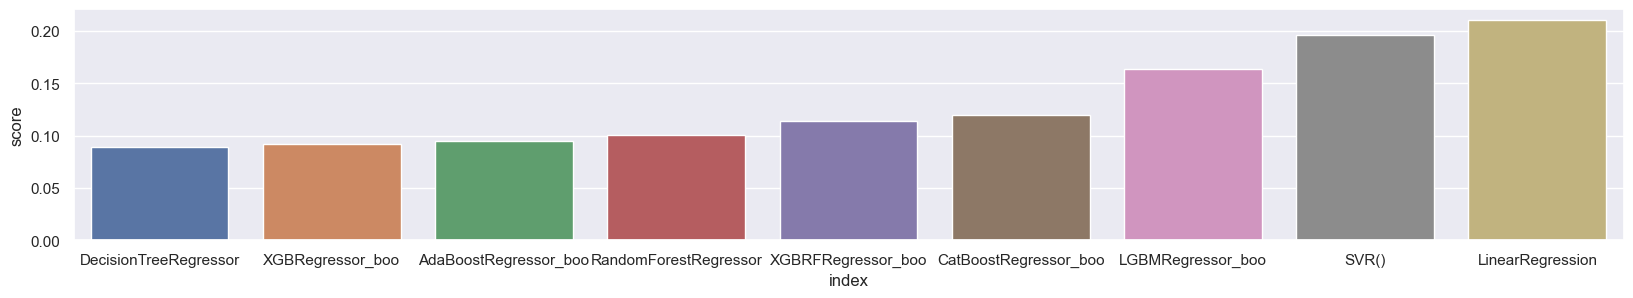

In [447]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(data=pd.DataFrame(outcome__yellow_mape.mean(),columns=['score']).reset_index().sort_values(by="score"),x="index",y="score");

In [448]:
outcome_red_all

,DecisionTreeRegressor,RandomForestRegressor,SVR(),LinearRegression,XGBRegressor_boo,XGBRFRegressor_boo,AdaBoostRegressor_boo,LGBMRegressor_boo,CatBoostRegressor_boo
date,,,,,,,,,
2023-07-16,9.213480,8.581499,7.721485,9.137922,8.753474,8.382736,8.827480,7.868116,8.660508
2023-07-23,9.213480,8.514718,7.732408,9.557252,8.750814,8.588882,8.827480,7.868116,8.548736
2023-07-30,9.213480,8.570729,7.740223,9.059334,8.834810,8.588677,8.827480,7.868116,8.481610
2023-08-06,8.827480,8.615993,7.750845,8.437684,8.750814,8.433848,8.827480,7.868116,8.394752
2023-08-13,7.824759,7.980212,7.850018,7.377897,7.727607,7.752497,7.767031,7.966054,7.828230
2023-08-20,7.742870,7.986112,7.859699,7.079353,7.741695,7.788583,7.767031,7.966054,7.839193
2023-08-27,7.742870,8.058188,7.881371,7.219916,7.721719,7.892836,7.824759,7.966054,7.884898
2023-09-03,8.827480,8.205084,7.883600,7.239479,8.169165,8.086424,8.103730,7.966054,7.972938
2023-09-10,6.984959,7.322583,7.680360,7.071191,6.979943,7.054940,7.244606,7.901178,7.259316


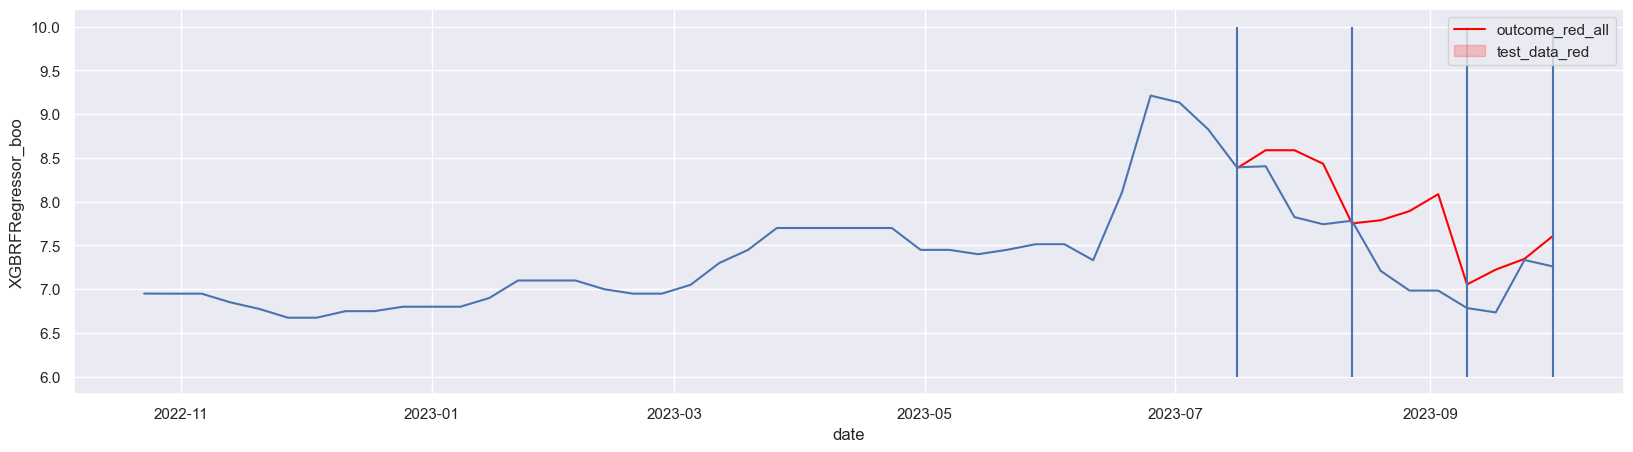

In [449]:
fig, ax = plt.subplots(figsize = (20,5));
y_min = 6
y_max = 10
sns.lineplot(outcome_red_all['XGBRFRegressor_boo'],color="red");
sns.lineplot(test_data_red[-50:]["price"]);
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
plt.legend(["outcome_red_all","test_data_red"])

In [450]:
outcome_green_all

,DecisionTreeRegressor,RandomForestRegressor,SVR(),LinearRegression,XGBRegressor_boo,XGBRFRegressor_boo,AdaBoostRegressor_boo,LGBMRegressor_boo,CatBoostRegressor_boo
date,,,,,,,,,
2023-07-16,7.961280,7.873169,7.132634,8.328158,7.951599,7.733712,7.961280,7.123615,7.722520
2023-07-23,7.961280,7.849164,7.157211,9.071428,7.961205,7.871199,7.961280,7.123615,7.660773
2023-07-30,7.961280,7.861713,7.184941,9.693173,7.961205,7.755845,7.961280,7.123615,7.621632
2023-08-06,7.961280,7.858094,7.213494,9.816251,7.960022,7.857331,7.961280,7.123615,7.586206
2023-08-13,7.193434,7.420728,7.305934,6.996581,7.167430,7.241665,7.193434,7.253109,7.220434
2023-08-20,7.193434,7.413867,7.307159,7.098228,7.166779,7.270140,7.193434,7.253109,7.235494
2023-08-27,7.193434,7.451205,7.318729,7.664812,7.174042,7.273142,7.193434,7.253109,7.247728
2023-09-03,7.193434,7.446864,7.318872,6.932330,7.170606,7.270936,7.193434,7.253109,7.263081
2023-09-10,6.560342,6.700413,7.063067,7.256425,6.593081,6.598937,6.560342,7.252487,6.788270


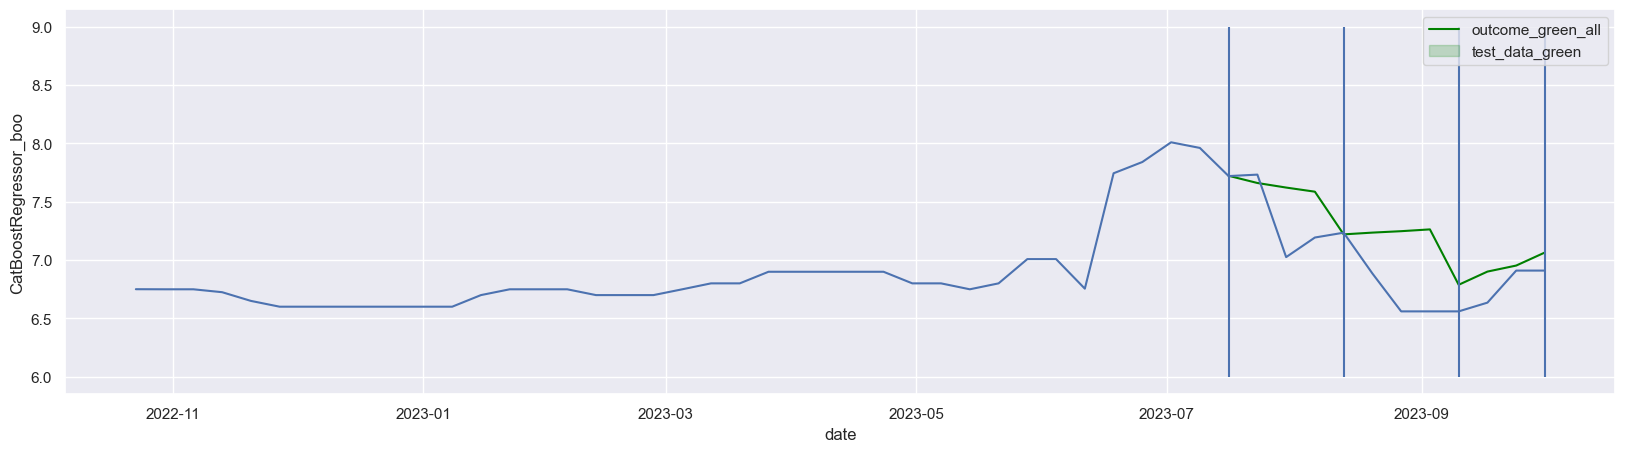

In [451]:
fig, ax = plt.subplots(figsize = (20,5));
y_min = 6
y_max = 9
sns.lineplot(outcome_green_all['CatBoostRegressor_boo'],legend=True,color="green");
sns.lineplot(test_data_green[-50:]["price"],legend=True);
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
plt.legend(["outcome_green_all","test_data_green"])

In [452]:
outcome_yelow_all

,DecisionTreeRegressor,RandomForestRegressor,SVR(),LinearRegression,XGBRegressor_boo,XGBRFRegressor_boo,AdaBoostRegressor_boo,LGBMRegressor_boo,CatBoostRegressor_boo
date,,,,,,,,,
2023-07-16,10.753280,10.287411,8.287448,11.111280,10.663376,9.816874,10.560280,8.516236,10.027157
2023-07-23,10.753280,10.317497,8.306201,11.957783,10.751355,10.402733,10.560280,8.516236,9.798756
2023-07-30,10.753280,10.407000,8.329289,12.617598,10.751956,10.415837,10.560280,8.516236,9.529491
2023-08-06,10.753280,10.404276,8.363181,13.785611,10.663669,10.041412,10.560280,8.516236,9.399173
2023-08-13,12.138784,11.574362,9.053829,12.882265,11.410035,11.102550,12.138784,9.338898,11.672809
2023-08-20,12.138784,11.589018,9.072805,13.814167,12.136607,11.789603,12.138784,9.338898,11.268971
2023-08-27,12.138784,11.567007,9.079146,14.422384,12.137642,11.773495,12.138784,9.338898,11.263750
2023-09-03,12.138784,11.516711,9.078019,15.050352,11.947849,11.756948,12.138784,9.338898,11.168014
2023-09-10,9.432754,9.918477,10.636838,9.234262,9.870872,10.085181,9.432754,10.074917,9.742304


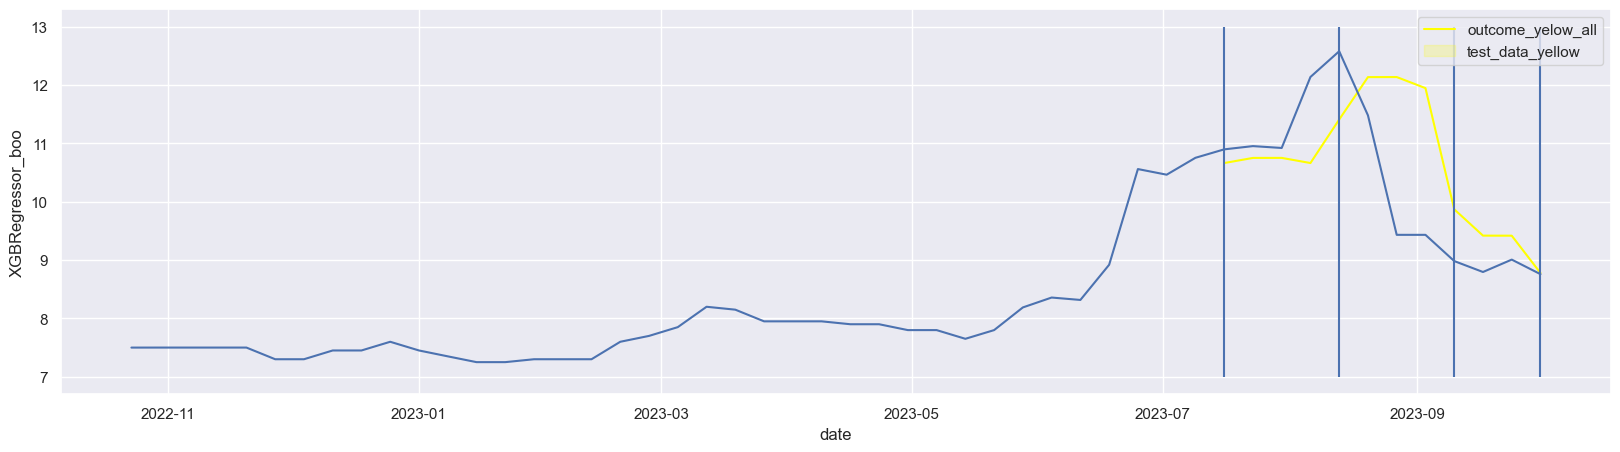

In [453]:
fig, ax = plt.subplots(figsize = (20,5));
y_min = 7
y_max = 13
sns.lineplot(outcome_yelow_all['XGBRegressor_boo'],legend=True,color="yellow");
sns.lineplot(test_data_yellow[-50:]["price"],legend=True);
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
plt.legend(["outcome_yelow_all","test_data_yellow"])

---

In [454]:
df2=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Final_Project_data\projection_outside_supply.csv")
df2

,week_end_dt,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,total_volume
0,2023-10-08,62609.9,0,2365023.5,27739.8,8678.3,False,False,True,False,2464051.7
1,2023-10-15,22744.0,0,2345998.8,15052.6,6508.7,False,False,True,False,2390304.2
2,2023-10-22,10961.5,0,2555267.6,0.0,15187.1,False,False,True,False,2581416.4
3,2023-10-29,9211.5,0,2530537.9,0.0,15187.1,False,False,True,False,2554936.6


In [455]:
for col in df2:
    if col in ["brazil_season","indonesia_season","india_season","china_season"]:
        df2[col]=df2[col].apply(lambda x:1 if x is True else 0)

In [456]:
df2

,week_end_dt,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,total_volume
0,2023-10-08,62609.9,0,2365023.5,27739.8,8678.3,0,0,1,0,2464051.7
1,2023-10-15,22744.0,0,2345998.8,15052.6,6508.7,0,0,1,0,2390304.2
2,2023-10-22,10961.5,0,2555267.6,0.0,15187.1,0,0,1,0,2581416.4
3,2023-10-29,9211.5,0,2530537.9,0.0,15187.1,0,0,1,0,2554936.6


In [457]:
df2["week_end_dt"]=pd.to_datetime(df2["week_end_dt"])

In [458]:
df2.set_index("week_end_dt",inplace=True)

In [459]:
df2

,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,total_volume
week_end_dt,,,,,,,,,,
2023-10-08,62609.9,0,2365023.5,27739.8,8678.3,0,0,1,0,2464051.7
2023-10-15,22744.0,0,2345998.8,15052.6,6508.7,0,0,1,0,2390304.2
2023-10-22,10961.5,0,2555267.6,0.0,15187.1,0,0,1,0,2581416.4
2023-10-29,9211.5,0,2530537.9,0.0,15187.1,0,0,1,0,2554936.6


In [460]:
df_red=pd.concat([df_red,df2]).fillna(0)
df_green=pd.concat([df_green,df2]).fillna(0)
df_yellow=pd.concat([df_yellow,df2]).fillna(0)

In [461]:
features_to_drop_forecast=list(df_red.columns)[14:]

In [462]:
shift=[4]
Roll_Window=[4]
def features_shift_forecast():       
    
        for col in df_red:
           for s in shift:
               for w in Roll_Window:
                  if col not in ["year","month","week"]:
                     df_red[f"{col}_shift_{s}_Rolling_{w}_forecast"]=df_red[col].rolling(window=w, min_periods=1).mean().shift(s)                   
                    
        for col in df_green:
           for s in shift:
               for w in Roll_Window:
                  if col not in ["year","month","week"]:
                     df_green[f"{col}_shift_{s}_Rolling_{w}__forecast"]=df_green[col].rolling(window=w, min_periods=1).mean().shift(s)                  
                   
        for col in df_yellow:
            for s in shift:
                for w in Roll_Window:
                  if col not in ["year","month","week"]:
                     df_yellow[f"{col}_shift_{s}_Rolling_{w}__forecast"]=df_yellow[col].rolling(window=w, min_periods=1).mean().shift(s)
                   
                   
                  
features_shift_forecast()

In [463]:
df_green.dropna(axis=0,inplace=True)
df_red.dropna(axis=0,inplace=True)
df_yellow.dropna(axis=0,inplace=True)

In [464]:
def features_drop_forecast():
    for col in df_red:
       if col  in features_to_drop_forecast:
           df_red.drop({col},axis=1,inplace=True)

    for col in df_green:
       if col  in features_to_drop_forecast:
            df_green.drop({col},axis=1,inplace=True)

    for col in df_yellow:
       if col  in features_to_drop_forecast:
            df_yellow.drop({col},axis=1,inplace=True)       
   
features_drop_forecast()               

In [465]:
df_red.shape

(398, 392)

In [466]:
xtrain_forecast=df_red[:-14].drop("price",axis=1)
ytrain_forecast=df_red[:-14]["price"]

In [467]:
xtest_forecast=df_red[-4:].drop("price",axis=1)
ytest_forecast=df_red[-4:]["price"]

In [468]:

forecast=XGBRFRegressor().fit(xtest_forecast,ytest_forecast)
forecast_red=forecast.predict(xtest_forecast)

<Axes: >

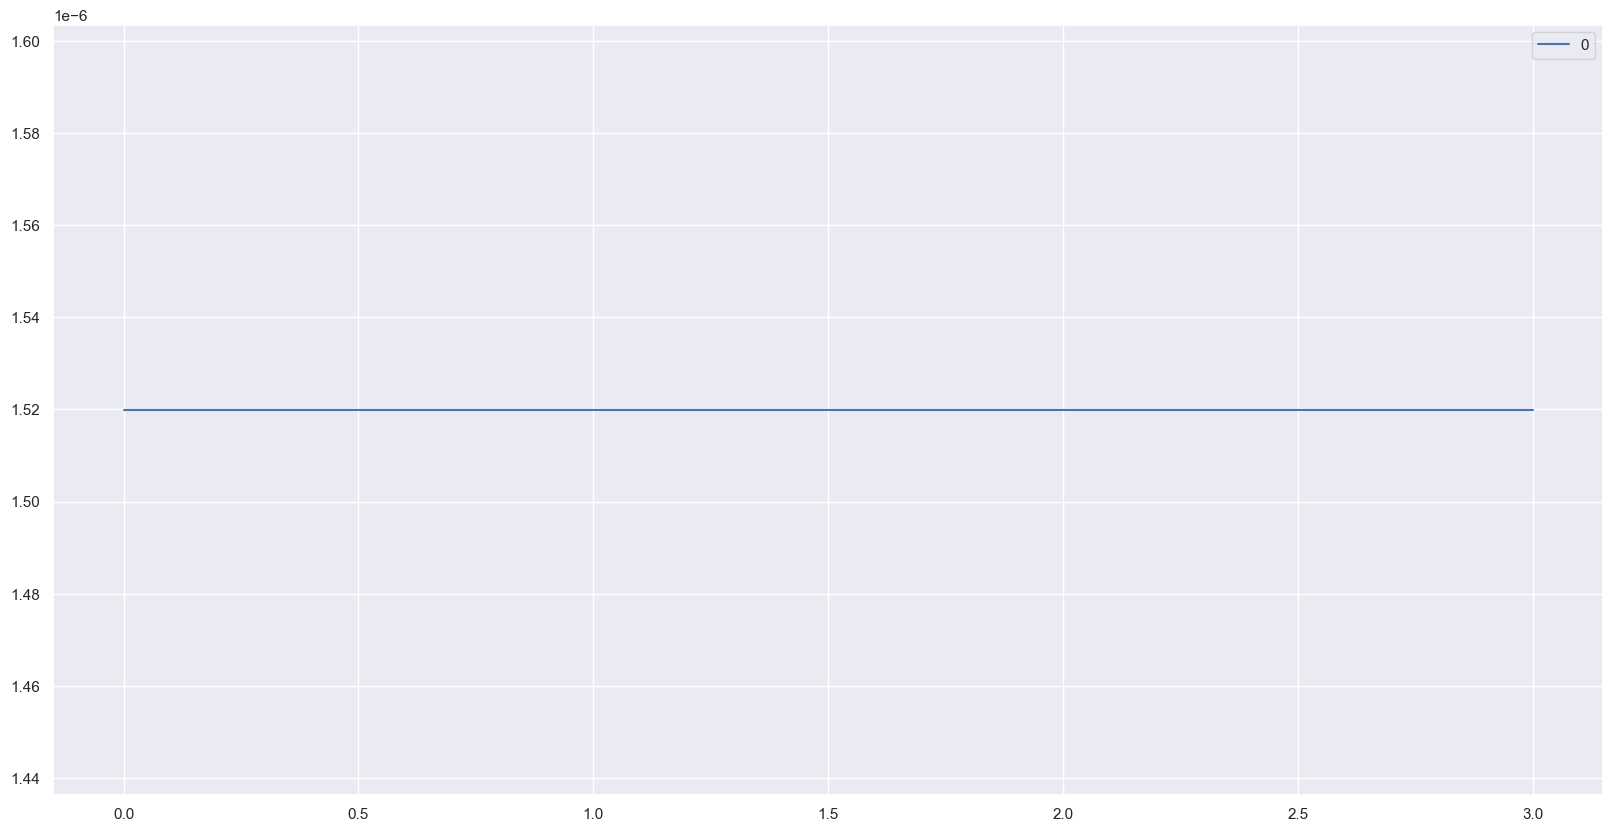

In [469]:
pd.DataFrame(forecast_red).plot()